# Przetwarzanie sygnałów i obrazów: Sprawozdanie 002

### Temat: Sygnały dyskretne, próbkowanie.
### Imię i nazwisko studenta: Paweł Niewiarowski, Szymon Łupiński
### Data realizacji ćwiczenia: 19.10.2022

In [1]:
from matplotlib import pyplot
from numpy import arange, zeros, linspace, pi, sin, sqrt, random, ndarray, empty
from math import ceil
from scipy import signal, io

## Zadanie 2.1
Wygenerować następujące sygnały dyskretne:

### A)
Impuls jednostkowy oraz impuls przesunięty o 40 próbek

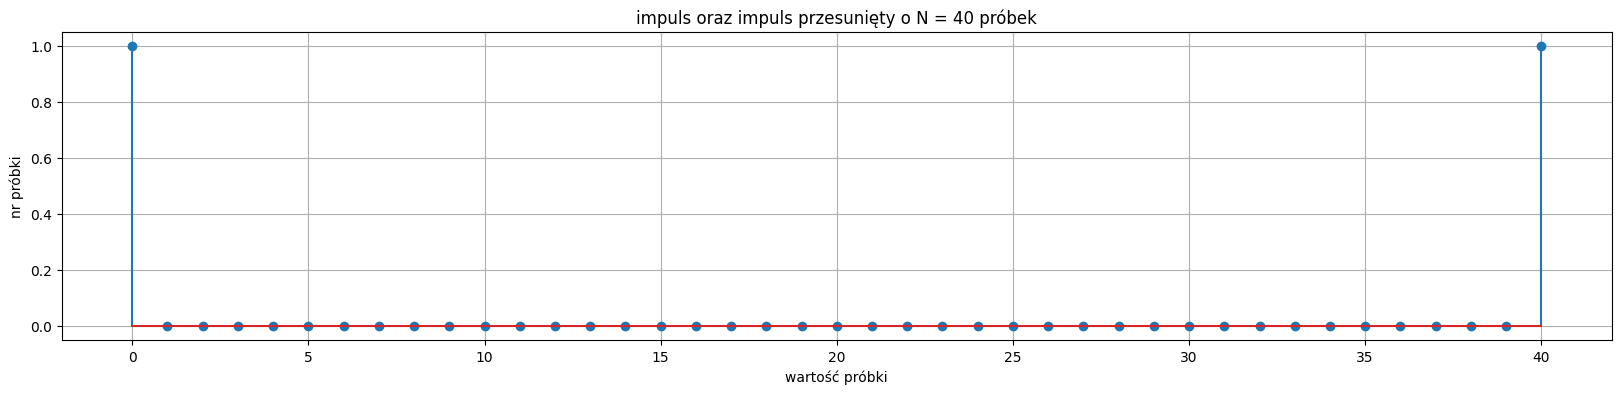

In [2]:
x_values: ndarray = arange(0, 41, 1)
y_values: ndarray = zeros(len(x_values), dtype=int)

y_values[0] = 1
y_values[len(x_values) - 1] = 1

fig, ax = pyplot.subplots()
fig.set_size_inches(20, 4)

ax.stem(x_values, y_values)
ax.grid()

ax.set_title('impuls oraz impuls przesunięty o N = 40 próbek')
ax.set_xlabel('wartość próbki')
ax.set_ylabel('nr próbki')

pyplot.show()

### B)
Przebiegi periodyczne (po 5 okresów, łącznie 200 próbek): sinusoidalny, piłokształtny, prostokątny. Wygenerowane sygnały przedstawić na wykresach w tym samym oknie

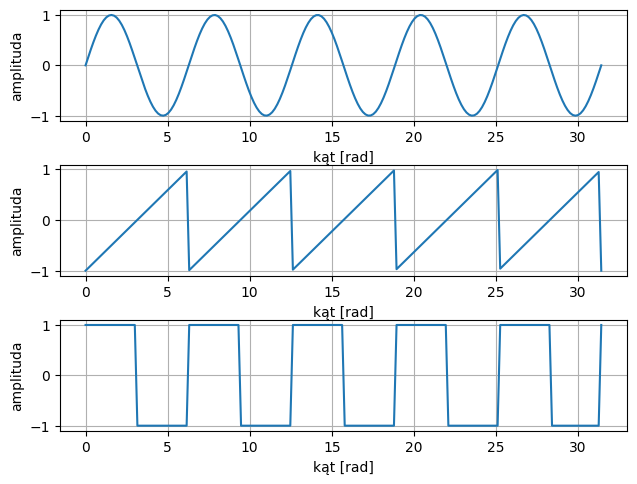

In [3]:
x_values: ndarray = linspace(0, 5 * pi * 2, 200)

fig, axs = pyplot.subplots(3)
fig.tight_layout()

axs[0].plot(x_values, sin(x_values))
axs[1].plot(x_values, signal.sawtooth(x_values))
axs[2].plot(x_values, signal.square(x_values))

for ax in axs:
    ax.grid()
    ax.set_xlabel('kąt [rad]')
    ax.set_ylabel('amplituda')

pyplot.show()

### C)
Szum gaussowski (200 próbek) dla parametrów: u = 0 oraz o^2 = 0.5

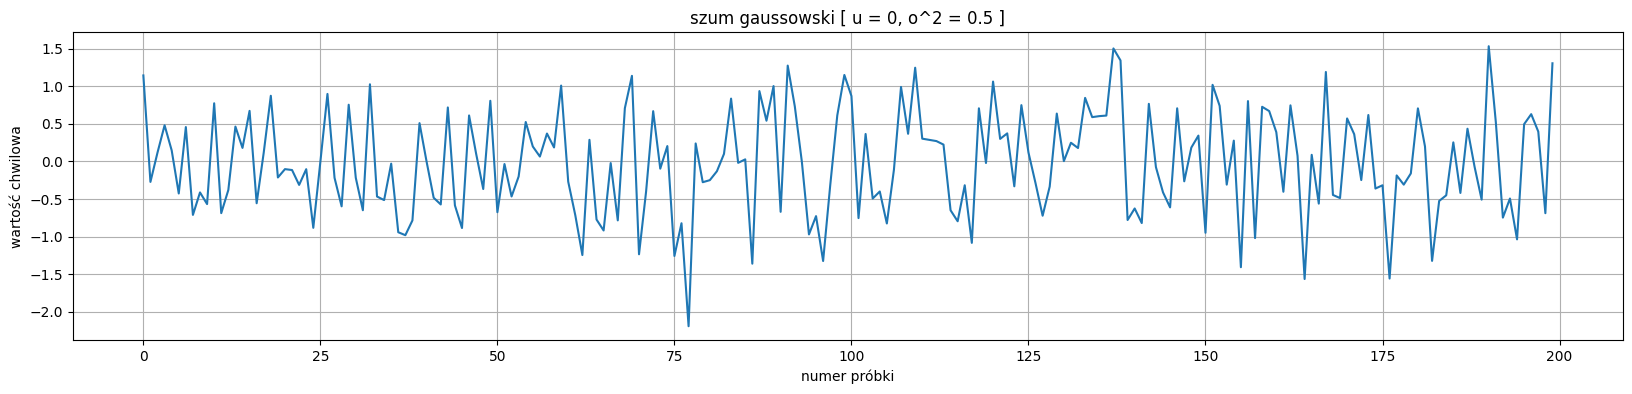

In [4]:
x_values: ndarray = arange(0, 200)
y_values: ndarray = random.normal(0, sqrt(1 / 2), len(x_values))

fig, ax = pyplot.subplots()
fig.set_size_inches(20, 4)

ax.plot(x_values, y_values)
ax.grid()

ax.set_title('szum gaussowski [ u = 0, o^2 = 0.5 ]')
ax.set_xlabel('numer próbki')
ax.set_ylabel('wartość chwilowa')

pyplot.show()

### Podpis
![Podpis](../signatures/002_001.jpg)

## Zadanie 2.2
Wygeneruj dyskretny sygnał sinusoidalny o amplitudzie A, częstotliwość f, przesunięciu fazowym o dla częstotliwości próbkowania f. Dla każdego ze wspomnianych parametrów sprządzić po trzy przykładowe przebiegi zmieniając odpowiednio ich wartości.

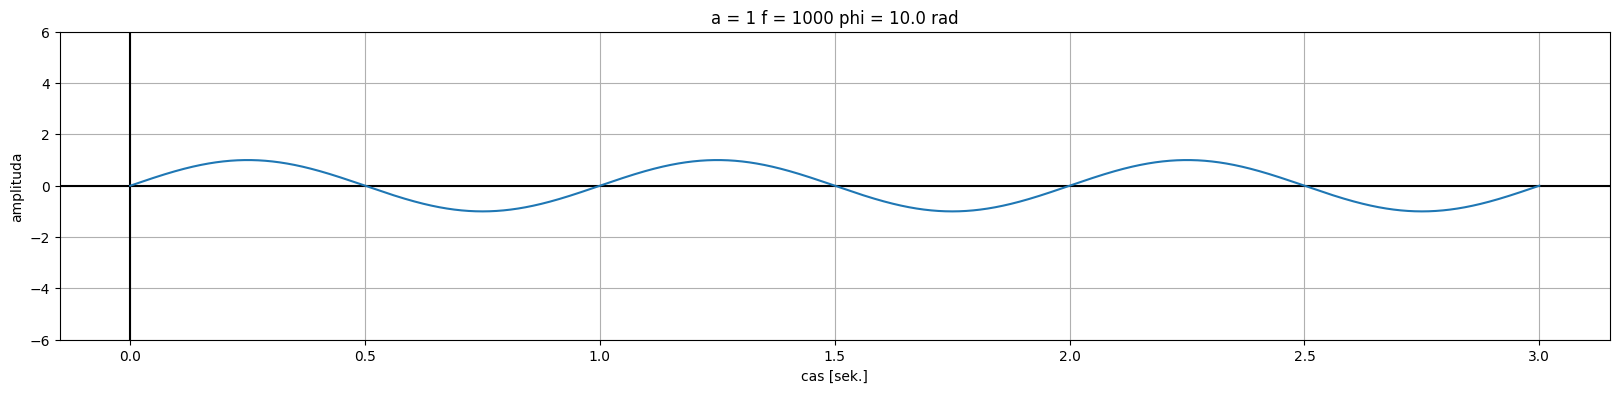

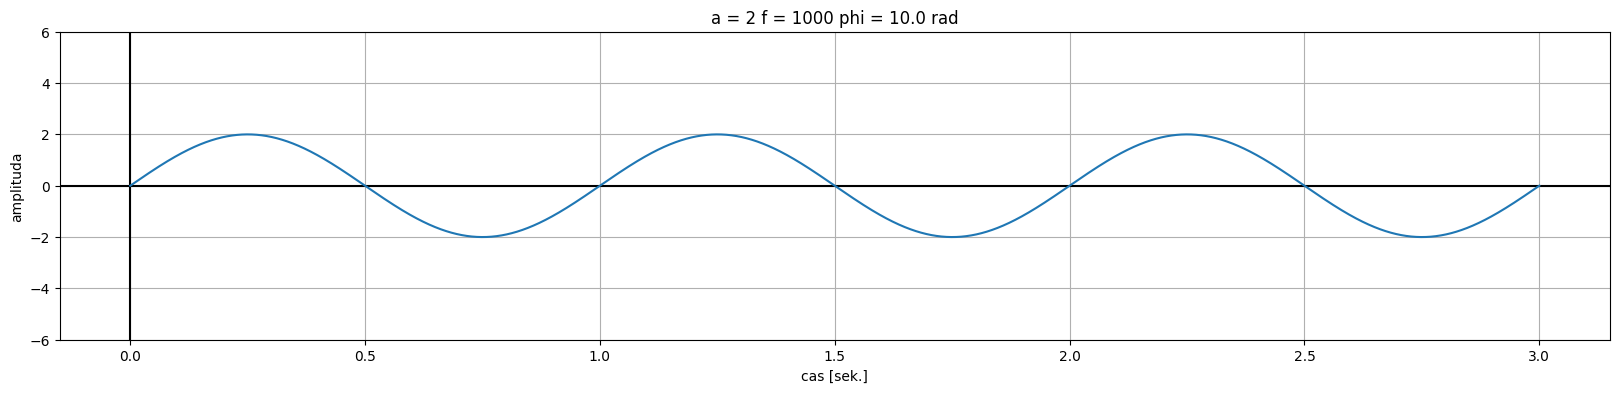

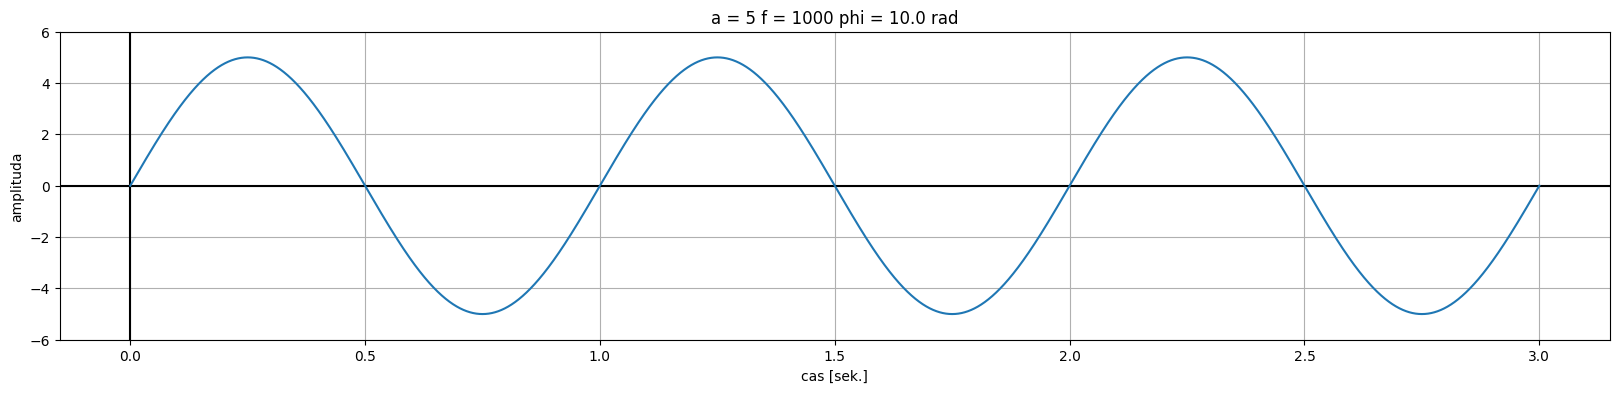

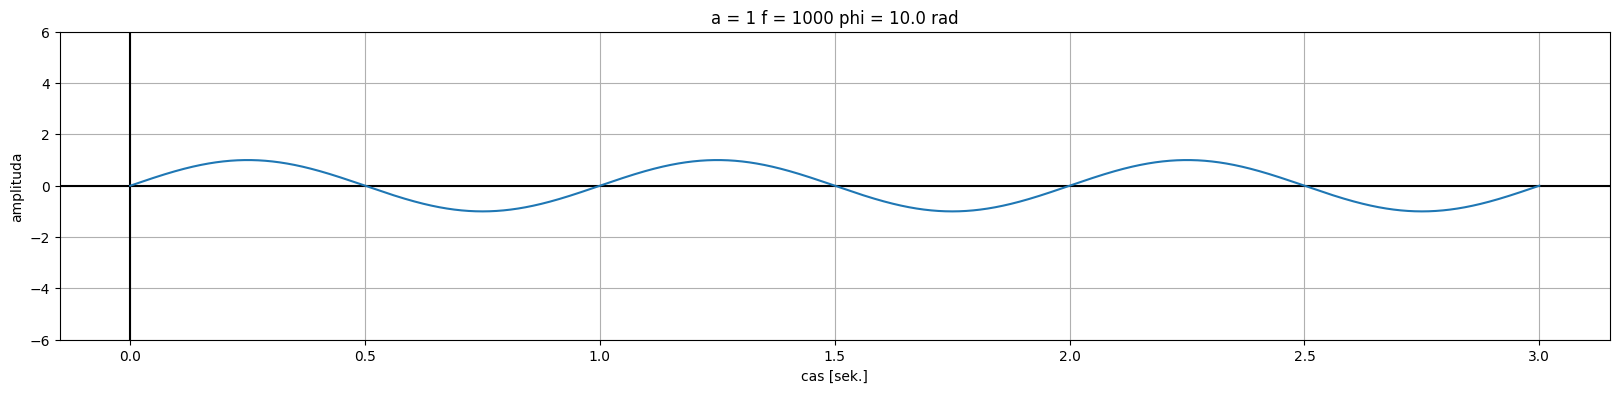

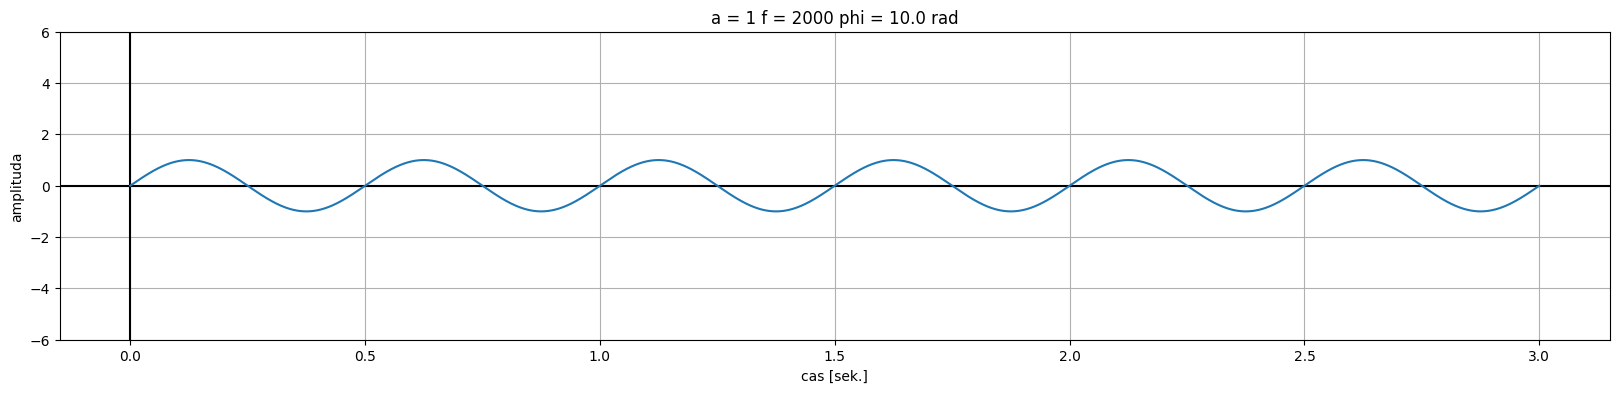

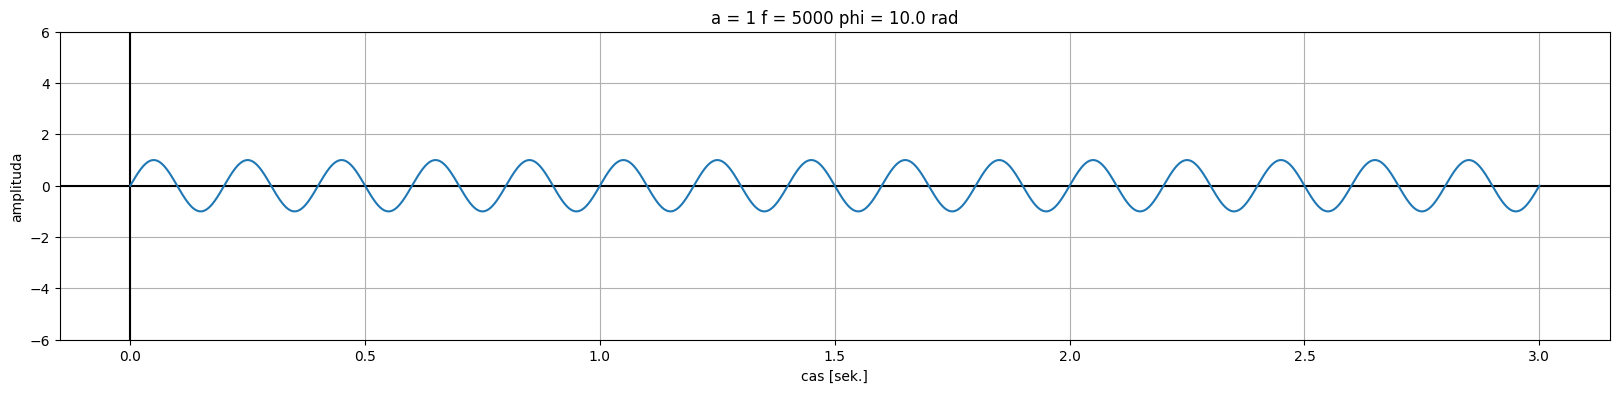

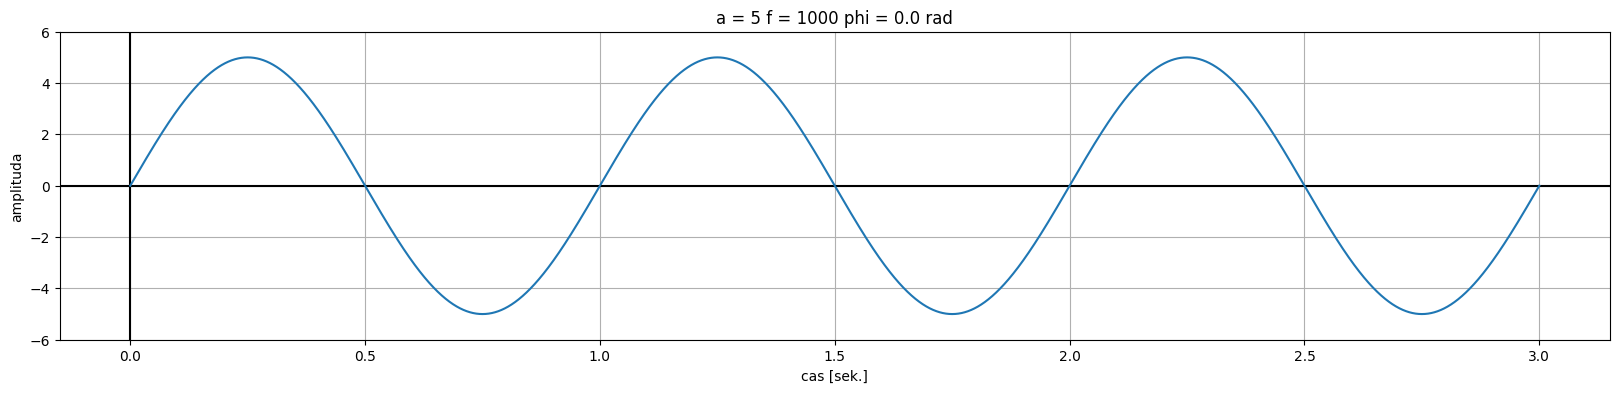

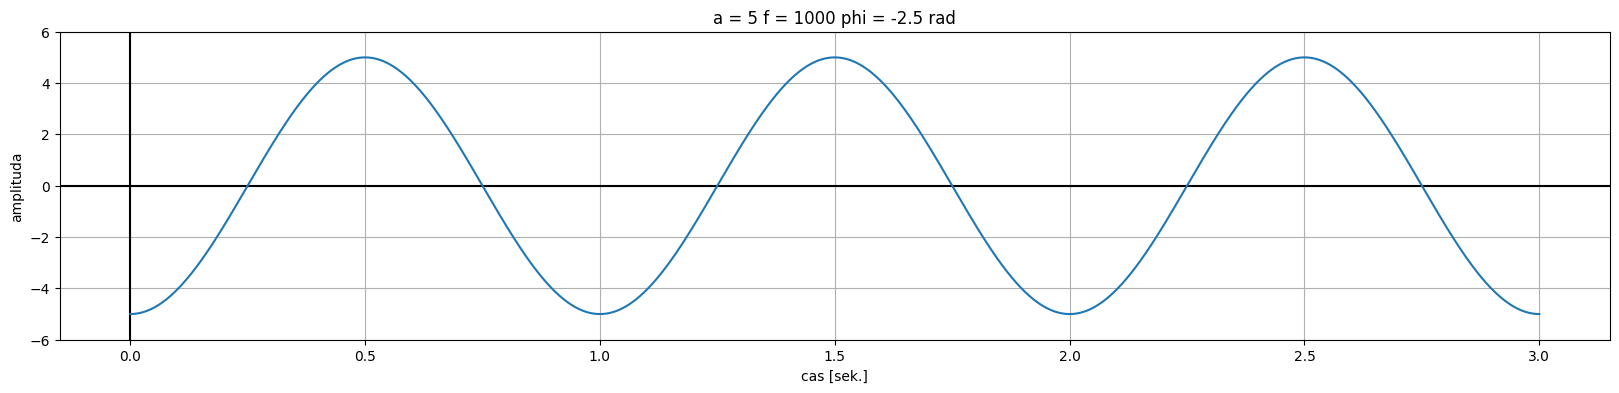

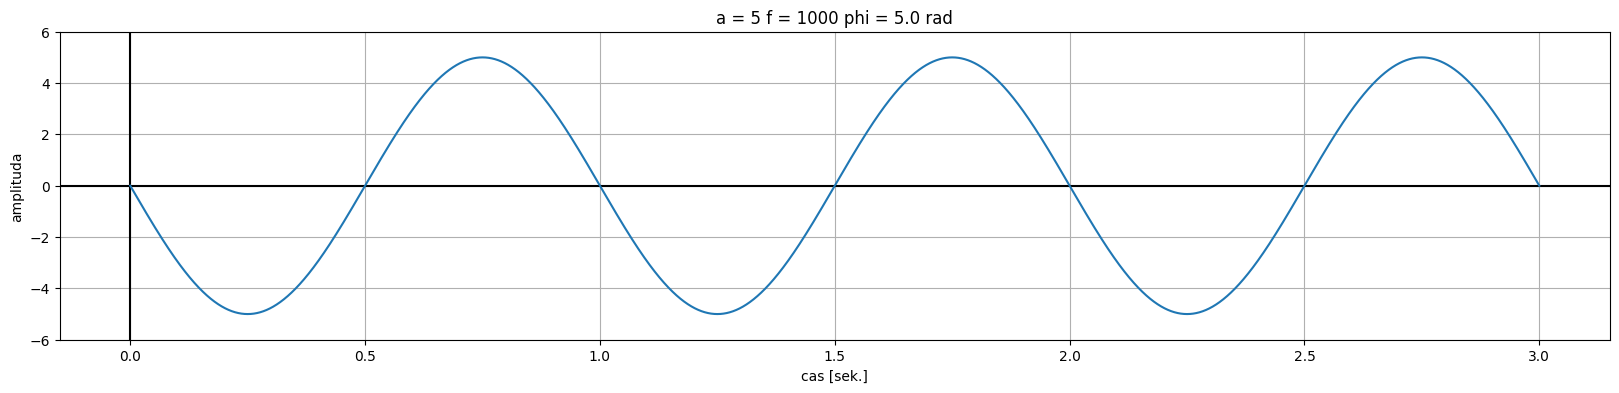

In [5]:
class Signal:
    FS = 44100
    DURATION = 3

    def __init__(self, a, f, phi):
        self.a = a
        self.f = f
        self.phi = phi
        self.x_values = []
        self.y_values = []

    def create(self):
        self.x_values = linspace(0, Signal.DURATION, Signal.DURATION * Signal.FS)
        self.y_values = sin((2 * pi * self.x_values * self.f / 1000) + self.phi) * self.a

    def show_plot(self):
        fig, ax = pyplot.subplots()

        fig.set_size_inches(20, 4)

        ax.set_title(f'a = {self.a} f = {self.f} phi = {self.phi / pi} rad')
        ax.set_xlabel('cas [sek.]')
        ax.set_ylabel('amplituda')

        ax.axhline(y=0, color='k')
        ax.axvline(x=0, color='k')

        ax.plot(self.x_values, self.y_values)
        ax.grid()

        pyplot.ylim(-6, 6)
        pyplot.show()


for signal in [
    Signal(1, 1000, 10 * pi),
    Signal(2, 1000, 10 * pi),
    Signal(5, 1000, 10 * pi),
    Signal(1, 1000, 10 * pi),
    Signal(1, 2000, 10 * pi),
    Signal(1, 5000, 10 * pi),
    Signal(5, 1000, 00 * pi),
    Signal(5, 1000, 10 * -(pi / 4)),
    Signal(5, 1000, 10 * pi / 2),
]:
    signal.create()
    signal.show_plot()


## Zadanie 2.3
Zasymulować próbkowanie sygnału sinusoidalnego o częstotliwości 1 kHz, zastosować różne wartości tempa próbkowania:

    - a) fs > 2 * f
    - b) fs = 2 * f
    - c) fs < 2 * f

Odp:

        Warunek Nyquista jest spełnieony tylko w przypadku a).

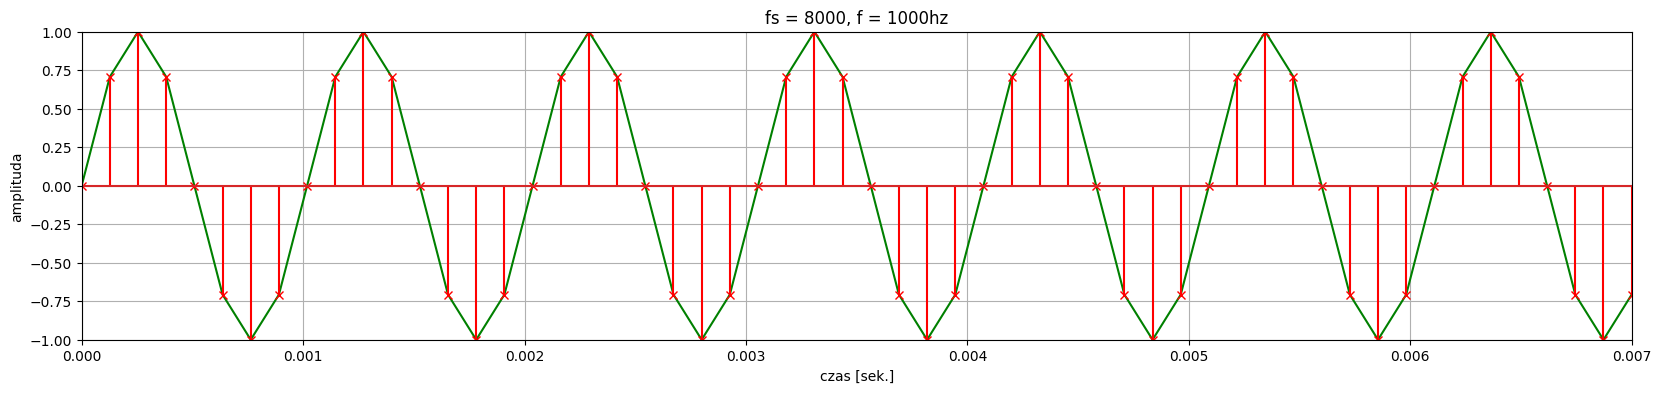

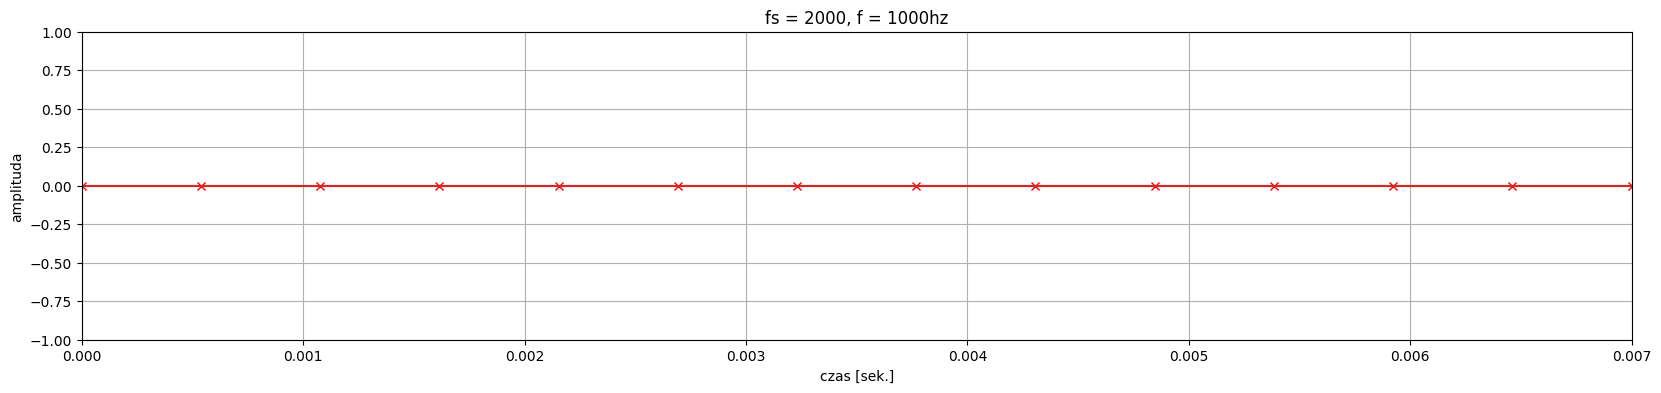

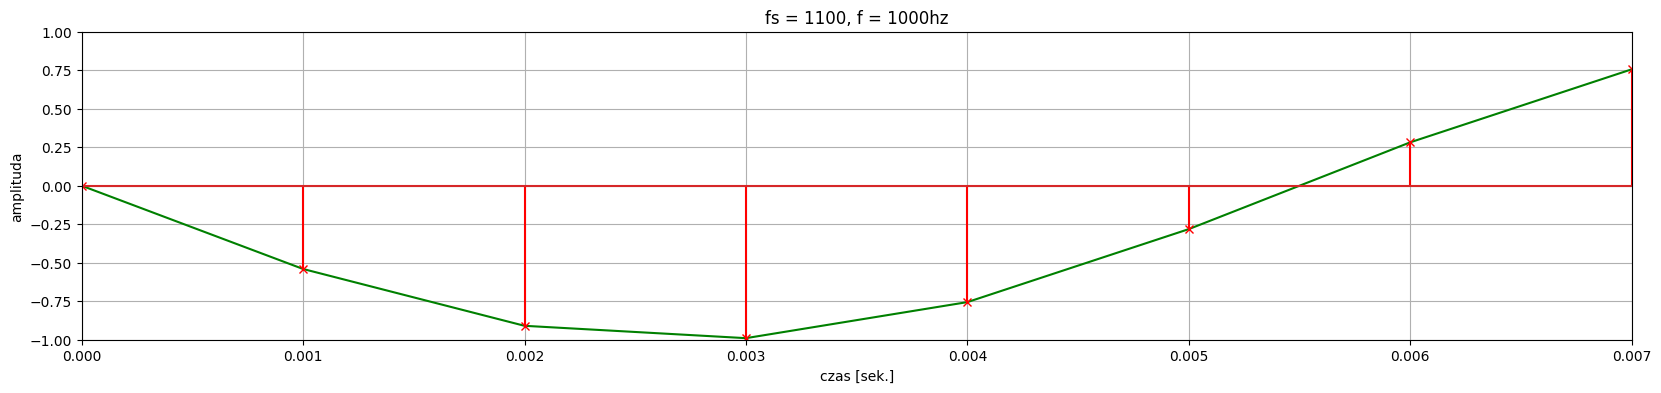

In [6]:
class SampleFrequencySignal:
    def __init__(self, fs, duration=7, scale=0.001):
        self.fs = fs
        self.duration = duration * scale
        self.x_values = []
        self.y_values = []

    def __create_sample(self, x):
        return sin(2 * pi * 1000 * x / self.fs)

    def create_signal(self):
        num_of_samples: int = ceil(self.duration * self.fs)

        self.x_values = linspace(0, self.duration, num_of_samples)
        self.y_values = empty(num_of_samples)

        for i in range(num_of_samples):
            self.y_values[i] = self.__create_sample(i)

    def show_plot(self):
        fig, ax = pyplot.subplots()

        fig.set_size_inches(20, 4)

        ax.set_xlabel('czas [sek.]')
        ax.set_ylabel('amplituda')
        ax.set_title(f'fs = {self.fs}, f = 1000hz')

        ax.plot(self.x_values, self.y_values, color="green")

        marker_line, _, _ = ax.stem(self.x_values, self.y_values, linefmt='red', markerfmt='x')
        marker_line.set_markerfacecolor('none')

        ax.grid()

        pyplot.xlim(0, self.duration)
        pyplot.ylim(-1, 1)
        pyplot.show()


for option in [
    SampleFrequencySignal(8000),
    SampleFrequencySignal(2000),
    SampleFrequencySignal(1100),
]:
    option.create_signal()
    option.show_plot()


## Zadanie 2.4
Wykorzystując mikrofon oraz dowolną aplikację do rejestracji dźwięków zarejestrować krótką wypowiedź np. odliczanie do trzech. Zarejestrowany sygnał zapisać do pliku wav(format mono, częstotliwość 44.1kHz). Otworzyć plik w środowisku
Python, a następnie odwrócić w czasie kolejność zarejestrowanych próbek.

    - a) Wykreślić oryginalnie zrejestrowany sygnał oraz sygnał odwrócony w czasie,
    - b) Dokonać superpozycji oryginalnego sygnału mowy z sygnałem szumu gaussowskiego (μ= 0, σ^2 = 1).

Uwaga, przed zsumowaniem sygnałów, przemnożyć sygnał szumu przez odpowiedni współczynnik
tak, aby stosunek sygnał-szum (SNR) = 3dB. Sporządzić wykresy czasowe sygnału oryginalnego i
zakłóconego. Porównać słuchowo sygnał oryginalny z sygnałem zakłóconym.

In [7]:
class AudioSignal:
    def __init__(self, path):
        self.fs, voice = io.wavfile.read(path)

        self.number_of_samples = len(voice)
        self.duration = self.number_of_samples / self.fs

        self.x_values = linspace(0, self.duration, self.number_of_samples)
        self.y_values = voice

        self.noise = None

    def reverse(self):
        self.y_values = self.y_values[::-1]

        return self

    def add_noise(self, noise):
        self.noise = noise

    def show_plot(self, title='', diff_flag=False):
        fig, ax = pyplot.subplots()

        fig.set_size_inches(20, 4)

        ax.plot(self.x_values, self.y_values, color='green')
        if not self.noise is None:
            ax.plot(self.x_values, self.noise, color='green')

        ax.set_title(title)
        ax.set_xlabel('czas [sek.]')
        ax.set_ylabel('amplituda')
        ax.grid()

        pyplot.show()

    def create_noise(self, avg, variance, multiplier):
        return random.normal(avg, sqrt(variance), self.number_of_samples) * multiplier


audio = AudioSignal('../audio/counting.wav')

### A)

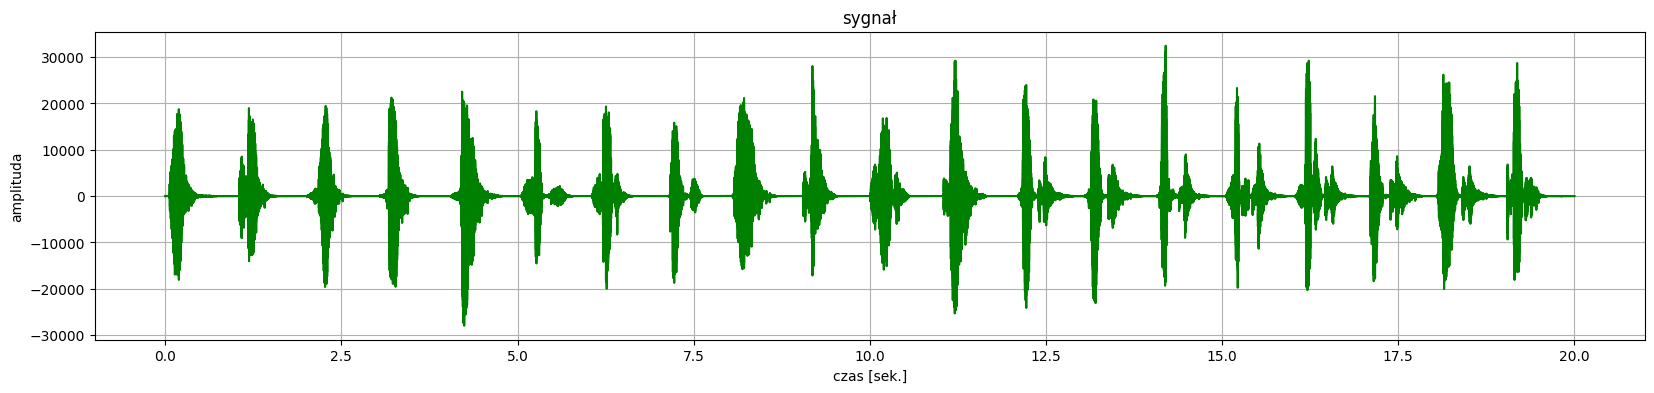

In [8]:
audio.show_plot('sygnał')

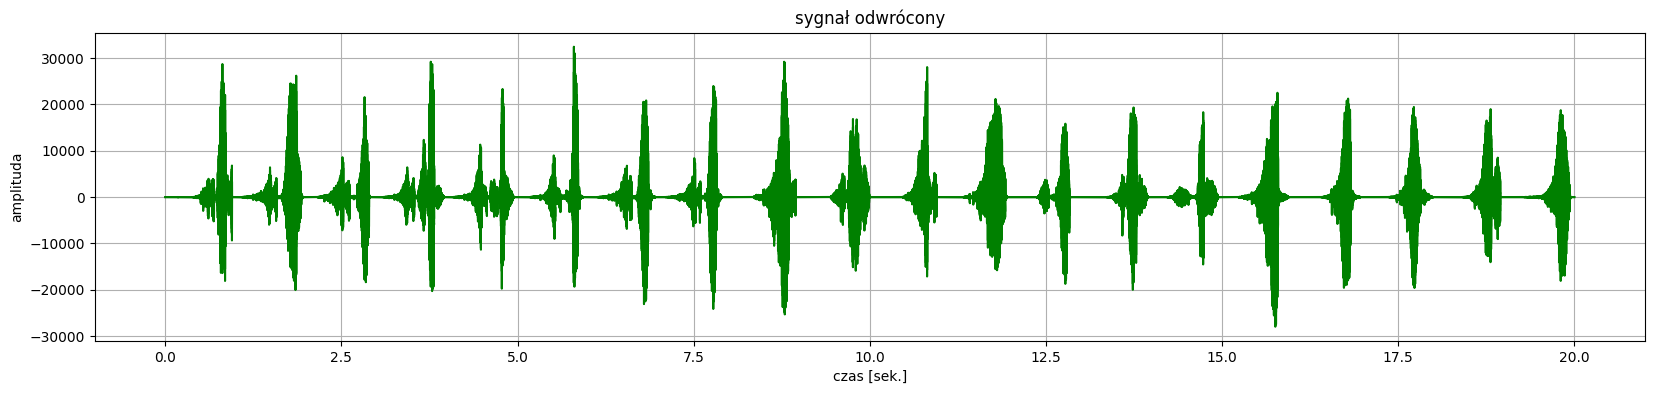

In [9]:
audio.reverse().show_plot('sygnał odwrócony')

### B)

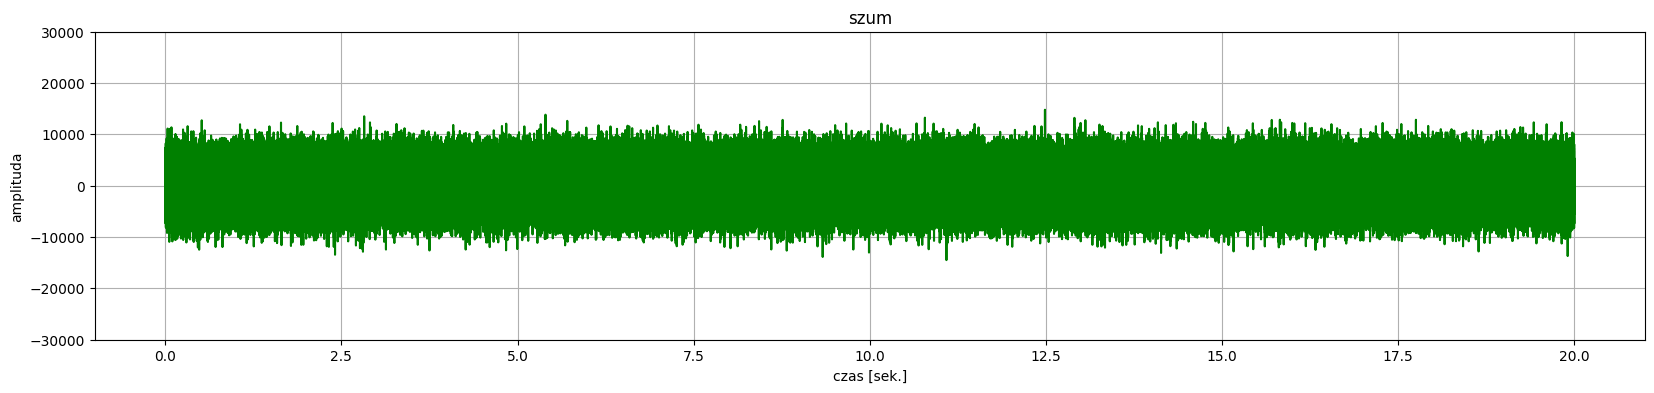

In [10]:
noise = audio.create_noise(0, 1, 3000)

fig, ax = pyplot.subplots()

fig.set_size_inches(20, 4)

ax.plot(audio.x_values, noise, color='green')

ax.set_title('szum')
ax.set_xlabel('czas [sek.]')
ax.set_ylabel('amplituda')

ax.set_ylim(-30000, 30000)

ax.grid()

pyplot.show()


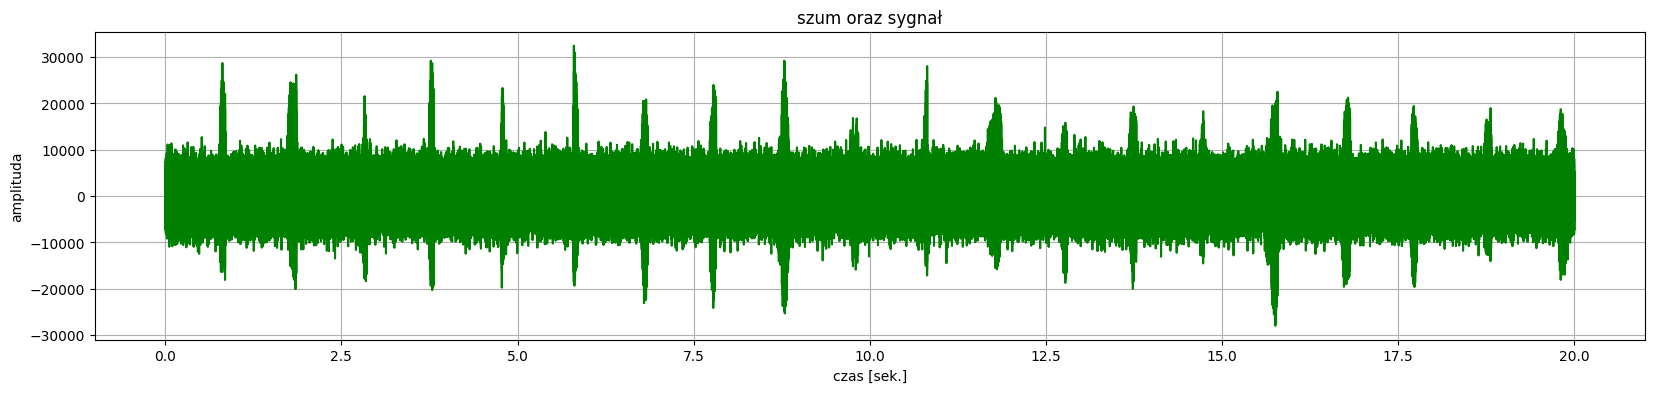

In [11]:
audio.add_noise(noise)
audio.show_plot('szum oraz sygnał')
